# Severity Prediction of An Accident

## Business Understanding

**When driving, a bunch of factors such as weather conditions, road conditions, whether or not it is due to inattention and so on. In addition, the number of different type of vehicles involved in the collision is also a crucial indicator to assess the severity of this collision. What we are gonna do is to build an appropriate classification model so that we are able to predict the severity of a collision using these existing attributes.**

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df.head(20)

/Users/apple/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


**There are total 194673 observations and 37 features in the dataset.
Features: X, Y, INCKEY, COLDETKEY, REPORTNO, STATUS, ADDRTYPE, INTKEY, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYCODE.1, SEVERITYDESC, INCDATE, INCDTTM, SDOT_COLCODE, SDOT_COLDESC, ST_COLCODE, ST_COLDESC, SDOTCOLNUM, SEGLANEKEY, CROSSWALKKEY are some general or descriptive features, so we will eliminate them in our prediction model.**

In [3]:
df.drop(columns = ['X',"Y", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "ADDRTYPE", "INTKEY", "LOCATION", 
            "EXCEPTRSNCODE", "EXCEPTRSNDESC", "SEVERITYCODE.1", "SEVERITYDESC", "INCDATE", 
            "INCDTTM", "SDOT_COLCODE", "SDOT_COLDESC", "ST_COLCODE", "ST_COLDESC", 
            "SDOTCOLNUM", "SEGLANEKEY", "CROSSWALKKEY"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE      194673 non-null int64
OBJECTID          194673 non-null int64
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
JUNCTIONTYPE      188344 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
PEDROWNOTGRNT     4667 non-null object
SPEEDING          9333 non-null object
HITPARKEDCAR      194673 non-null object
dtypes: int64(6), object(10)
memory usage: 23.8+ MB


In [4]:
def func(x):
    if x == "N":
        return "N"
    elif x == "Y":
        return "Y"
    elif x=="0":
        return "N"
    else:
        return "Y"
    
df['UNDERINFL'] = df['UNDERINFL'].apply(func)
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].fillna(value='N')
df['SPEEDING'] = df['SPEEDING'].fillna(value='N')
df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna(value='N')

In [5]:
df = df.replace("Unknown",np.nan)

In [6]:
df.isnull().any(axis=0)

SEVERITYCODE      False
OBJECTID          False
COLLISIONTYPE      True
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
JUNCTIONTYPE       True
INATTENTIONIND    False
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
PEDROWNOTGRNT     False
SPEEDING          False
HITPARKEDCAR      False
dtype: bool

**There are some observations with missing values in all the following features: COLLISIONTYPE, JUNCTIONTYPE, UNDERINFL, WEATHER, ROADCOND and LIGHTCOND, so these observations will be dropped.**

In [7]:
df.dropna(subset=['COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND'],inplace=True)

## Data Preparation

**Now, there are total 167980 observations without missing values.**

In [8]:
df['SEVERITYCODE'] = np.where(df['SEVERITYCODE']==2,1,0)
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('category')

In [9]:
df['SEVERITYCODE'].value_counts()

0    112477
1     55503
Name: SEVERITYCODE, dtype: int64

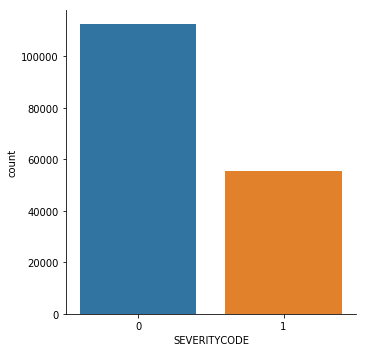

In [10]:
sns.catplot(x="SEVERITYCODE",kind="count",data=df)

**0 is prop damage and 1 represents there are some injuries. We can see above that data is imbalanced.**

In [11]:
# get some info of "COLLISIONTYPE"
df['COLLISIONTYPE'].value_counts()

Angles        33742
Parked Car    32589
Rear Ended    32489
Other         22093
Sideswipe     17484
Left Turn     13357
Pedestrian     6274
Cycles         5202
Right Turn     2803
Head On        1947
Name: COLLISIONTYPE, dtype: int64

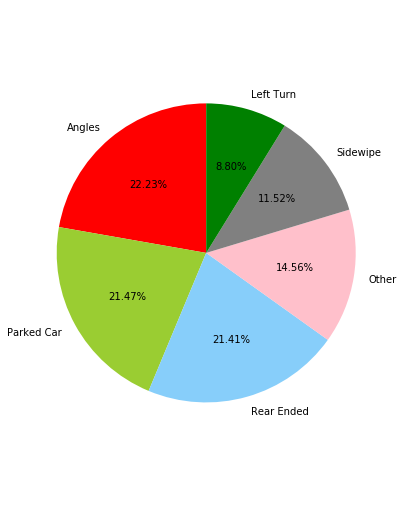

In [12]:
plt.figure(figsize=(6,9))
labels = [u'Angles',u'Parked Car',u'Rear Ended',u'Other',u'Sidewipe',u'Left Turn']
sizes = df['COLLISIONTYPE'].value_counts()[0:6] 
colors = ['red','yellowgreen','lightskyblue','pink','gray','green']

patches,text1,text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 

plt.axis('equal')
plt.show()

In [13]:
# get some info of "WEATHER"
df['WEATHER'].value_counts()

Clear                       107310
Raining                      32309
Overcast                     26566
Snowing                        818
Fog/Smog/Smoke                 544
Other                          250
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

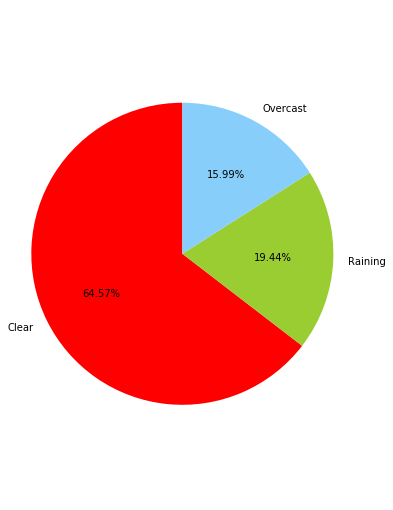

In [14]:
plt.figure(figsize=(6,9))
labels = [u'Clear',u'Raining',u'Overcast']
sizes = df['WEATHER'].value_counts()[0:3] 
colors = ['red','yellowgreen','lightskyblue']

patches,text1,text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 

plt.axis('equal')
plt.show()

**Encoding Variables**

In [15]:
col1 = ['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'] # categorical vars with 2 levels
col2 = ['COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND'] # categorical vars with multiple levels

In [16]:
for col in col1:
    df[col] = df[col].astype('category')   

In [17]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].cat.rename_categories({"N":0, "Y":1})
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].cat.rename_categories({"N":0, "Y":1})
df['SPEEDING'] = df['SPEEDING'].cat.rename_categories({"N":0, "Y":1})
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].cat.rename_categories({"N":0, "Y":1})
df['UNDERINFL'] = df['UNDERINFL'].cat.rename_categories({"N":0, "Y":1})

In [18]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
for col in col1:
    df[col] = lbl.fit_transform(df[col])

In [19]:
df = pd.get_dummies(df, columns=col2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 194672
Data columns (total 53 columns):
SEVERITYCODE                                                      167980 non-null category
OBJECTID                                                          167980 non-null int64
PERSONCOUNT                                                       167980 non-null int64
PEDCOUNT                                                          167980 non-null int64
PEDCYLCOUNT                                                       167980 non-null int64
VEHCOUNT                                                          167980 non-null int64
INATTENTIONIND                                                    167980 non-null int64
UNDERINFL                                                         167980 non-null int64
PEDROWNOTGRNT                                                     167980 non-null int64
SPEEDING                                                          167980 non-null int64
HITPAR

**In this dataset, the dependent variable is "SEVERITYCODE", which represents the severity of the collision. In terms of the fatures, I created some dummy variables for the categorical variables with multiple levels (They are 'COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND').**

**So far, there are total 14 relevant features that coud be first selected using some feature reduction methodologies and then be incorporated into the classification model to predict the severity of the collision.**

## Modeling

**Several prediction models will be built using machine learning algorithms. I will first Balanced Random Forest(BRF) algorithm, a variation of Random Forest specially designed to better manage data imbalance. BalancedBaggingClassifier allows to resample each subset of data before to train each estimator of the ensemble. In short, it combines the output of an EasyEnsemble sampler with an ensemble of classifiers (i.e. BaggingClassifier). Therefore, BalancedBaggingClassifier takes the same parameters than the scikit-learn BaggingClassifier. Additionally, there is two additional parameters, sampling_strategy and replacement to control the behaviour of the random under-sampler.**

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from numpy import trapz
from scipy.integrate import simps
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score,balanced_accuracy_score

In [22]:
def Evaluate(labels, predictions, p=0.5):
    CM= confusion_matrix(labels, predictions > p)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('Severity=1 detected (True Negatives): {}'.format(TN))
    print('Severity =2 Missed (False Negatives):  {}'.format(FN))
    print('Severity=2 Detected (True Positives): {}'.format(TP))
    print('Severity=2 incorrectly Detected (False Positives):{}'.format(FP))
    auc = roc_auc_score(labels, predictions)
    prec=precision_score(labels, predictions>0.5)
    rec=recall_score(labels, predictions>0.5)
     # calculate F1 score
    f1 = f1_score(labels, predictions>p)
    print('auc :{}'.format(auc))
    print('precision :{}'.format(prec))
    print('recall :{}'.format(rec))
    print('f1 :{}'.format(f1))
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(labels, predictions >0.5)
    #use the trapezoidal rule to calculate the area under the precion-recall curve
    area =  trapz(recall, precision)
   
    #area =  simps(recall, precision)
    print("Area Under Precision Recall  Curve(AP): %0.4f" % area) 

In [23]:
X = df.iloc[:,2:]
y =  df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [24]:
#gridsearch
# param_grid = {
#     'n_estimators' : [500],
#     'max_features':[0.1,0.5,0.7]
# }

# clf = GridSearchCV(BalancedBaggingClassifier(DecisionTreeClassifier()),
#                    param_grid, scoring = "roc_auc")
# grid_result = clf.fit(X_train, y_train)

In [25]:
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [26]:
tree = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(base_estimator=tree,
                                sampling_strategy = 'auto',
                                replacement=False,
                                n_jobs=-1,
                                random_state=0,
                                n_estimators=500,
                                max_samples=0.5,
                                max_features=0.3)

bbc.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          max_features=0.3, max_samples=0.5, n_estimators=500,
                          n_jobs=-1, random_state=0)

In [27]:
y_pred = bbc.predict_proba(X_test.values)[:,1]
Evaluate(labels=y_test, predictions=y_pred, p=0.5)

Severity=1 detected (True Negatives): 22420
Severity =2 Missed (False Negatives):  4957
Severity=2 Detected (True Positives): 11547
Severity=2 incorrectly Detected (False Positives):11470
auc :0.7631215067438251
precision :0.501672676717209
recall :0.6996485700436258
f1 :0.5843475620556159
Area Under Precision Recall  Curve(AP): 0.3223


## Evaluation

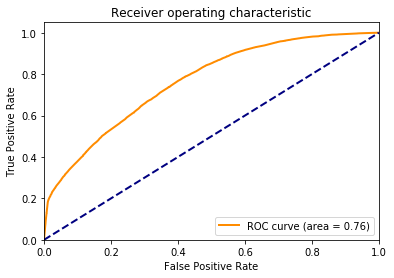

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()